## CS 4661: Group Project
#### Classification of TikTok Songs
#### Group: Alvin Lew, Fabio Carrasco, Diane Tabilas, Denise Tabilas

### 1. Data Exploration and Preprocessing
- Combine all five datasets into a new, labeled one

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read all data files
songs_2019 = pd.read_csv('./Data/TikTok_songs_2019.csv')
songs_2020 = pd.read_csv('./Data/TikTok_songs_2020.csv')
songs_2021 = pd.read_csv('./Data/TikTok_songs_2021.csv')
songs_2022 = pd.read_csv('./Data/TikTok_songs_2022.csv')
unpopular_songs = pd.read_csv('./Data/unpopular_songs.csv')


In [3]:
(songs_2019['duration_ms']/1000).describe()

count    223.000000
mean     180.451502
std       54.352580
min       43.427000
25%      145.440000
50%      177.479000
75%      216.779500
max      410.089000
Name: duration_ms, dtype: float64

In [4]:
(unpopular_songs['duration_ms']/1000).describe()

count    10877.000000
mean       205.578175
std        106.763092
min          4.693000
25%        151.152000
50%        197.522000
75%        244.428000
max       3637.277000
Name: duration_ms, dtype: float64

In [5]:
songs_2019

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Shake It,Metro Station,53,Metro Station,68,0.618,0.955,-3.836,1,4,0.0798,0.00221,0.000003,0.4860,0.790,150.034,4,179947
1,Chinese New Year,SALES,61,SALES - EP,53,0.744,0.845,-7.422,0,4,0.2530,0.75900,0.232000,0.1000,0.749,75.221,4,160000
2,Baby I'm Yours,Breakbot,57,By Your Side,69,0.829,0.792,-3.755,0,2,0.0668,0.72600,0.000006,0.1220,0.758,118.050,4,215507
3,The Git Up,Blanco Brown,60,The Git Up,2,0.847,0.678,-8.635,1,9,0.1090,0.06690,0.000000,0.2740,0.811,97.984,4,200594
4,Say Hey (I Love You),Michael Franti & Spearhead,58,All Rebel Rockers,0,0.738,0.983,-4.374,0,5,0.0855,0.03800,0.000006,0.1830,0.957,92.998,4,235760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Skinny Legend Anthem,Ava Louise,32,Skinny Legend Anthem,50,0.845,0.518,-7.568,1,11,0.2990,0.07030,0.000000,0.1220,0.443,129.951,4,135993
219,Material Girl,Madonna,77,Celebration (double disc version),78,0.742,0.883,-3.419,1,0,0.0329,0.33300,0.000008,0.0964,0.978,136.506,4,240280
220,I Wish - Radio Edit,Skee-Lo,51,I Wish,63,0.715,0.738,-10.139,1,7,0.1570,0.00826,0.000000,0.2600,0.573,97.877,4,252307
221,Oh No I Got a Disease,Buss Crew,11,Oh No I Got a Disease,26,0.649,0.735,-4.365,0,10,0.7300,0.14600,0.000000,0.1240,0.845,86.704,5,134769


In [6]:
unpopular_songs.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit,popularity,track_name,track_artist,track_id
0,0.530,0.770,4,-6.633,0,0.0389,0.284,0.501000,0.744,0.623,120.144,225696,False,2,No Regrets,James Reeder,6f2c4a9lNx8aowZJngv7cJ
1,0.565,0.730,1,-6.063,1,0.0730,0.365,0.000000,0.237,0.511,130.026,158093,False,2,Wild Life,James Reeder,3fTs52jsDzSuVLsifxNKO8
2,0.427,0.546,4,-8.727,1,0.0849,0.539,0.015200,0.368,0.435,78.345,167262,False,2,Fangs,James Reeder,6NPafqavrv0icaIHMQnXDy
3,0.421,0.531,7,-5.516,1,0.0262,0.706,0.000208,0.110,0.383,85.080,236832,False,2,Afterburner,James Reeder,3vGmhxveURgmlZStvo0uc1
4,0.537,0.804,8,-7.378,0,0.1570,0.379,0.000489,0.323,0.543,139.950,239400,False,2,Hellfire Rising,James Reeder,4O2qRbfCHzMMgfbw9DBdGf


In [7]:
unpopular_songs.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'explicit', 'popularity', 'track_name', 'track_artist',
       'track_id'],
      dtype='object')

In [8]:
# Confirm that all of the tiktok datasets have the same features
list(songs_2019.columns) == list(songs_2020.columns) == list(songs_2021.columns) == list(songs_2022.columns)

True

In [9]:
# Rename a column from the unpopular songs dataset so that everything matches with the TikTok song datasets
unpopular_songs.rename(columns = {'track_artist':'artist_name'}, inplace = True)

In [10]:
unpopular_songs.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'explicit', 'popularity', 'track_name', 'artist_name',
       'track_id'],
      dtype='object')

In [11]:
# Label both the unpopular songs and the popular TikTok songs
unpopular_songs['is_popular'] = False
songs_2019["is_popular"] = True
songs_2020["is_popular"] = True
songs_2021["is_popular"] = True
songs_2022["is_popular"] = True

In [12]:
cols_of_interest = ['track_name', 'artist_name', 'danceability', 'energy', 
       'loudness', 'mode', 'key', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo','duration_ms', 'is_popular']

# Concatenate/combine all 5 datasets into one
combined_df = pd.concat([songs_2019[cols_of_interest], songs_2020[cols_of_interest], songs_2021[cols_of_interest], 
       songs_2022[cols_of_interest], unpopular_songs[cols_of_interest]])

# Concatenate / combine all 5 datasets into one
combined_df

,track_name,artist_name,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,is_popular
0,Shake It,Metro Station,0.618,0.9550,-3.836,1,4,0.0798,0.00221,0.000003,0.486,0.7900,150.034,179947,True
1,Chinese New Year,SALES,0.744,0.8450,-7.422,0,4,0.2530,0.75900,0.232000,0.100,0.7490,75.221,160000,True
2,Baby I'm Yours,Breakbot,0.829,0.7920,-3.755,0,2,0.0668,0.72600,0.000006,0.122,0.7580,118.050,215507,True
3,The Git Up,Blanco Brown,0.847,0.6780,-8.635,1,9,0.1090,0.06690,0.000000,0.274,0.8110,97.984,200594,True
4,Say Hey (I Love You),Michael Franti & Spearhead,0.738,0.9830,-4.374,0,5,0.0855,0.03800,0.000006,0.183,0.9570,92.998,235760,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10872,Bugs n Toes,"Good Girl, Bad Boy",0.686,0.1320,-20.363,1,0,0.0339,0.26800,0.001050,0.181,0.4910,95.987,285286,False
10873,Scattered Thoughts,"Good Girl, Bad Boy",0.532,0.0573,-20.476,0,11,0.0479,0.90000,0.087700,0.111,0.0731,114.123,360729,False
10874,Travelin Bug,"Good Girl, Bad Boy",0.589,0.0308,-27.237,1,3,0.0405,0.94300,0.014200,0.106,0.5040,83.952,286585,False
10875,Goodnight,"Good Girl, Bad Boy",0.669,0.0381,-18.631,1,7,0.0382,0.78300,0.000000,0.182,0.1730,99.841,349454,False


In [13]:
# Convert and save to csv
combined_df.to_csv('./Data/combined_songs_dataset.csv', index=False)

In [14]:
numPop = len(combined_df[combined_df.is_popular == True])
numUnPop = len(combined_df[combined_df.is_popular == False])

print("Popular: " + str(numPop))
print("Unpopular: " + str(numUnPop))
print("Percentage of songs that are popular: " + str(round(numPop/(numPop + numUnPop)*100, 2)) + "%")

Popular: 968
Unpopular: 10877
Percentage of songs that are popular: 8.17%


In [15]:
# Check for duplicate data
combined_df[combined_df.duplicated()]

,track_name,artist_name,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,is_popular
187,It's You,Ali Gatie,0.7320,0.46300,-6.972,0,11,0.0287,0.37400,0.000000,0.1940,0.39700,95.971,212607,True
0,Say So,Doja Cat,0.7870,0.67300,-4.583,0,11,0.1590,0.26400,0.000003,0.0904,0.77900,110.962,237893,True
17,Buttercup,Jack Stauber,0.7050,0.37300,-9.066,1,7,0.0384,0.72300,0.810000,0.2890,0.55100,120.046,208026,True
18,Dissolve,Absofacto,0.6880,0.58200,-10.668,0,6,0.0542,0.23000,0.000157,0.0663,0.87200,85.486,224661,True
20,Airplane Mode,Limbo,0.6650,0.37300,-10.631,1,7,0.1580,0.85200,0.118000,0.1080,0.07000,119.905,164113,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9437,Whispering Waves,Sleep Waves,0.2050,0.00801,-23.200,1,0,0.0511,0.62800,0.869000,0.1220,0.03110,128.145,179878,False
9439,Steady River Flow,Water Soundscapes,0.1060,0.00214,-21.715,1,1,0.0526,0.12200,0.287000,0.1120,0.02690,93.350,199647,False
9440,Meandering River,Ocean Waves For Sleep,0.1560,1.00000,-20.650,1,7,0.0585,0.84800,0.380000,0.9450,0.00001,108.253,244413,False
9441,Tanquil Lake Shores,Ocean Waves For Sleep,0.0786,0.07260,-21.645,1,10,0.0508,0.06480,0.681000,0.0888,0.02070,176.989,153030,False


In [16]:
# Some duplicates are caused by the same song in different albums (be dropped)
songs_2019[songs_2019['track_name'] == "It's You"]

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,is_popular
73,It's You,Ali Gatie,70,YOU,79,0.732,0.463,-6.972,0,11,0.0287,0.374,0.0,0.194,0.397,95.971,4,212607,True
187,It's You,Ali Gatie,70,It's You,5,0.732,0.463,-6.972,0,11,0.0287,0.374,0.0,0.194,0.397,95.971,4,212607,True


In [17]:
# Duplicates are caused by different IDs in the unpopular songs dataset (can also be dropped)
combined_df[combined_df['track_name'] == 'Whispering Waves']

,track_name,artist_name,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,is_popular
2883,Whispering Waves,Sleep Waves,0.205,0.00801,-23.2,1,0,0.0511,0.628,0.869,0.122,0.0311,128.145,179878,False
9437,Whispering Waves,Sleep Waves,0.205,0.00801,-23.2,1,0,0.0511,0.628,0.869,0.122,0.0311,128.145,179878,False


In [18]:
# Actually remove the duplicates
combined_df.drop_duplicates()

,track_name,artist_name,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,is_popular
0,Shake It,Metro Station,0.618,0.9550,-3.836,1,4,0.0798,0.00221,0.000003,0.486,0.7900,150.034,179947,True
1,Chinese New Year,SALES,0.744,0.8450,-7.422,0,4,0.2530,0.75900,0.232000,0.100,0.7490,75.221,160000,True
2,Baby I'm Yours,Breakbot,0.829,0.7920,-3.755,0,2,0.0668,0.72600,0.000006,0.122,0.7580,118.050,215507,True
3,The Git Up,Blanco Brown,0.847,0.6780,-8.635,1,9,0.1090,0.06690,0.000000,0.274,0.8110,97.984,200594,True
4,Say Hey (I Love You),Michael Franti & Spearhead,0.738,0.9830,-4.374,0,5,0.0855,0.03800,0.000006,0.183,0.9570,92.998,235760,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10872,Bugs n Toes,"Good Girl, Bad Boy",0.686,0.1320,-20.363,1,0,0.0339,0.26800,0.001050,0.181,0.4910,95.987,285286,False
10873,Scattered Thoughts,"Good Girl, Bad Boy",0.532,0.0573,-20.476,0,11,0.0479,0.90000,0.087700,0.111,0.0731,114.123,360729,False
10874,Travelin Bug,"Good Girl, Bad Boy",0.589,0.0308,-27.237,1,3,0.0405,0.94300,0.014200,0.106,0.5040,83.952,286585,False
10875,Goodnight,"Good Girl, Bad Boy",0.669,0.0381,-18.631,1,7,0.0382,0.78300,0.000000,0.182,0.1730,99.841,349454,False


### 1.5 Encode variables?

In [19]:
# # key is categorical, so we can try encoding that
# combined_df["key"].value_counts()

In [20]:
# # encode the "key" feature
# one_hot = pd.get_dummies(combined_df['key'], prefix='key')

# # drop the old column and add the new encoded ones
# combined_df = combined_df.drop('key', axis=1)
# combined_df = combined_df.join(one_hot)

# combined_df.columns

### 2. Split data into training, validation, and testing

In [21]:
# Get feature columns (everything except for the label)
feature_cols = combined_df.columns[combined_df.columns != 'is_popular']
feature_cols

Index(['track_name', 'artist_name', 'danceability', 'energy', 'loudness',
       'mode', 'key', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [22]:
X = combined_df[feature_cols]
y = combined_df['is_popular']

print(X.shape)
print(y.shape)

(11845, 14)
(11845,)


In [23]:
# split into training and testing datasets
# we will use a 60/20/20 split for training, validation, and testing
from sklearn.model_selection import train_test_split

X_training, X_final_test, y_training, y_final_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [24]:
# this is what we will train with
X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.25, random_state=6)

### 3. KNN models
- Try running KNN models on our new dataset (we try to classify the data into "popular" and "unpopular")

In [25]:
# these are the columns we'll use for training (they're all numerical)
training_cols = list(feature_cols)
training_cols.remove('track_name')
training_cols.remove('artist_name')

X_train = X_train[training_cols]
X_test = X_test[training_cols]
X_final_test = X_final_test[training_cols]

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# let's try a variety of k's
k_list = [1, 3, 5, 7, 11, 15, 25, 50, 75]
models = []

for k in k_list:
    # instantiate a KNeighborsClassifier and train a KNN on the data
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # save each model to a list
    models.append(knn_model)


print(models)

[KNeighborsClassifier(n_neighbors=1), KNeighborsClassifier(n_neighbors=3), KNeighborsClassifier(), KNeighborsClassifier(n_neighbors=7), KNeighborsClassifier(n_neighbors=11), KNeighborsClassifier(n_neighbors=15), KNeighborsClassifier(n_neighbors=25), KNeighborsClassifier(n_neighbors=50), KNeighborsClassifier(n_neighbors=75)]


In [27]:
from sklearn.metrics import accuracy_score

# test the accuracy of all our models
for model, k in zip(models, k_list):
    # try making prediction with each model
    y_predict = model.predict(X_test)

    # get the accuracy score
    accuracy = accuracy_score(y_test, y_predict)

    # print the k value and the accuracy for each model
    print(f'k value: {k} \tAccuracy: {round(accuracy, 3)}')
    

k value: 1 	Accuracy: 0.871
k value: 3 	Accuracy: 0.895
k value: 5 	Accuracy: 0.907
k value: 7 	Accuracy: 0.916
k value: 11 	Accuracy: 0.921
k value: 15 	Accuracy: 0.921
k value: 25 	Accuracy: 0.921
k value: 50 	Accuracy: 0.921
k value: 75 	Accuracy: 0.921


In [28]:
final_knn_model = KNeighborsClassifier(n_neighbors=50)
final_knn_model.fit(X_train, y_train)

y_predict = final_knn_model.predict(X_final_test)
accuracy_validation = accuracy_score(y_test, y_predict)
accuracy_testing = accuracy_score(y_final_test, y_predict)

print(f'KNN model accuracy (validation): {round(accuracy_validation, 3)}')
print(f'KNN model accuracy (testing): {round(accuracy_testing, 3)}')

KNN model accuracy (validation): 0.921
KNN model accuracy (testing): 0.918


In [29]:
def printGridResults(grid_search):
    print("Best parameter set found: \n")
    print(grid_search.best_params_)

    print("\nScores on train set:\n")
    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.3f (2*std = %0.03f) for %r"
                % (mean, std * 2, params))

In [30]:
from sklearn.model_selection import GridSearchCV

# let's use GridSearchCV to try a variety of parameter combinations for our model
param_grid = {
    'n_neighbors': [20, 50, 75, 100], 
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'metric': ['euclidian', 'manhattan']
    }

knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = knn_model, param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


c:\Users\fcarras\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\fcarras\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\fcarras\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "c:\Users\fcarras\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "c:\Users\fcarras\Anaconda3

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'metric': ['euclidian', 'manhattan'],
                         'n_neighbors': [20, 50, 75, 100],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [31]:
printGridResults(grid_search)

Best parameter set found: 

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 75, 'weights': 'distance'}

Scores on train set:

nan (2*std = nan) for {'algorithm': 'auto', 'metric': 'euclidian', 'n_neighbors': 20, 'weights': 'uniform'}
nan (2*std = nan) for {'algorithm': 'auto', 'metric': 'euclidian', 'n_neighbors': 20, 'weights': 'distance'}
nan (2*std = nan) for {'algorithm': 'auto', 'metric': 'euclidian', 'n_neighbors': 50, 'weights': 'uniform'}
nan (2*std = nan) for {'algorithm': 'auto', 'metric': 'euclidian', 'n_neighbors': 50, 'weights': 'distance'}
nan (2*std = nan) for {'algorithm': 'auto', 'metric': 'euclidian', 'n_neighbors': 75, 'weights': 'uniform'}
nan (2*std = nan) for {'algorithm': 'auto', 'metric': 'euclidian', 'n_neighbors': 75, 'weights': 'distance'}
nan (2*std = nan) for {'algorithm': 'auto', 'metric': 'euclidian', 'n_neighbors': 100, 'weights': 'uniform'}
nan (2*std = nan) for {'algorithm': 'auto', 'metric': 'euclidian', 'n_neighbors': 100, 'weights': 'dis

In [32]:
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 75, 'weights': 'distance'}

# this is the best model found by GridSearchCV
#final_knn_model = KNeighborsClassifier(algorithm='auto', n_neighbors=100, weights='distance')
final_knn_model = KNeighborsClassifier(algorithm='auto', metric='manhattan', n_neighbors=75, weights='distance')
final_knn_model.fit(X_train, y_train)

y_predict = final_knn_model.predict(X_final_test)
accuracy_validation = accuracy_score(y_test, y_predict)
accuracy_testing = accuracy_score(y_final_test, y_predict)

print(f'Best KNN model accuracy (validation): {round(accuracy_validation, 3)}')
print(f'Best KNN model accuracy (testing): {round(accuracy_testing, 3)}')

Best KNN model accuracy (validation): 0.906
Best KNN model accuracy (testing): 0.932


### 4. Logistic Regression Models

In [33]:
# import class for modeling
from sklearn.linear_model import LogisticRegression

#instantiate LogisticRegression object
logreg = LogisticRegression()

#train model with fit
logreg.fit(X_train, y_train)

#testing/prediction of the trained object
y_predict_lr = logreg.predict(X_test)

In [34]:
# check accuracy of the classifier on validation set
accuracy_lr = accuracy_score(y_test, y_predict)
print(accuracy_lr)
print(f'Accuracy: {round(accuracy_lr, 3)}')

0.9058674546222034
Accuracy: 0.906


In [35]:
# check accuracy of the classifier on testing set
y_predict_lr = logreg.predict(X_final_test)
accuracy_lr = accuracy_score(y_final_test, y_predict)
print(accuracy_lr)
print(f'Accuracy: {round(accuracy_lr, 3)}')

0.9316167159138877
Accuracy: 0.932


### 5. Decision Tree Models

In [36]:
from sklearn.tree import DecisionTreeClassifier

# create object 
d_tree = DecisionTreeClassifier()

# train 
d_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
# test
y_predict = d_tree.predict(X_test)

# check accuracy 
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.8805403123680878


In [38]:
# test final test set 
y_predict = d_tree.predict(X_final_test)

# check accuracy 
accuracy = accuracy_score(y_final_test, y_predict) 
print(accuracy)

0.8894048121570283


### 6. Random Forest Models

In [39]:
from sklearn.ensemble import RandomForestClassifier

# You can adjust parameters:
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

# for training:  my_RandomForest.fit 
# for testing/prediction:  my_RandomForest.predict

my_RandomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=19, random_state=2)

In [40]:
# check accuracy of the classifier on validation set
y_predict = my_RandomForest.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
print(f'Accuracy: {round(accuracy, 3)}')

0.939636977627691
Accuracy: 0.94


In [41]:
# check accuracy of the classifier on final testing set
y_predict = my_RandomForest.predict(X_final_test)
accuracy = accuracy_score(y_final_test, y_predict) 
print(accuracy)
print(f'Accuracy: {round(accuracy, 3)}')

0.9316167159138877
Accuracy: 0.932


### 7. SVC Models
- Try using support vector classifiers for our predictions

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [43]:
# check accuracy of the classifier on validation set
y_predict = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict) 
print(accuracy)
print(f'Accuracy: {round(accuracy, 3)}')

0.9214858590122414
Accuracy: 0.921


In [44]:
# check accuracy of the classifier on final testing set
y_predict = clf.predict(X_final_test)
accuracy = accuracy_score(y_final_test, y_predict) 
print(accuracy)
print(f'Accuracy: {round(accuracy, 3)}')

0.9176867876741241
Accuracy: 0.918


### 8. XGBoost
- Try the XGBoost algorithm, https://xgboost.readthedocs.io/en/stable/

In [45]:
import sys
!{sys.executable} -m pip install xgboost

In [46]:
import xgboost as xgb


In [47]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [48]:
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 1])

In [49]:
# check accuracy of the classifier on validation set
accuracy = accuracy_score(y_test, y_predict) 
print(accuracy)
print(f'Accuracy: {round(accuracy, 3)}')

0.9349936682144365
Accuracy: 0.935


In [50]:
# check accuracy of the classifier on final testing set
y_predict = model.predict(X_final_test)
accuracy = accuracy_score(y_final_test, y_predict) 
print(accuracy)
print(f'Accuracy: {round(accuracy, 3)}')

0.9311945968763191
Accuracy: 0.931


In [51]:
combined_df.describe()

,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,1.184500e+04
mean,0.584837,0.557328,-10.974457,0.635880,5.228620,0.137318,0.343228,0.215818,0.209896,0.471293,118.193575,2.039278e+05
std,0.202842,0.252237,6.673374,0.481203,3.623385,0.157725,0.335993,0.359646,0.186884,0.269999,30.821928,1.033722e+05
min,0.000000,0.000020,-51.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.693000e+03
25%,0.458000,0.393000,-13.342000,0.000000,2.000000,0.038700,0.035100,0.000000,0.098900,0.252000,93.995000,1.518930e+05
50%,0.616000,0.579000,-9.060000,1.000000,5.000000,0.059900,0.218000,0.000077,0.128000,0.478000,118.030000,1.961380e+05
75%,0.739000,0.747000,-6.450000,1.000000,8.000000,0.186000,0.629000,0.345000,0.267000,0.689000,138.550000,2.405470e+05
max,0.986000,1.000000,3.108000,1.000000,11.000000,0.962000,0.996000,1.000000,0.999000,0.995000,239.500000,3.637277e+06


In [52]:
feature_cols

Index(['track_name', 'artist_name', 'danceability', 'energy', 'loudness',
       'mode', 'key', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

Not popular: 10877 
Popular: 968


<AxesSubplot:>

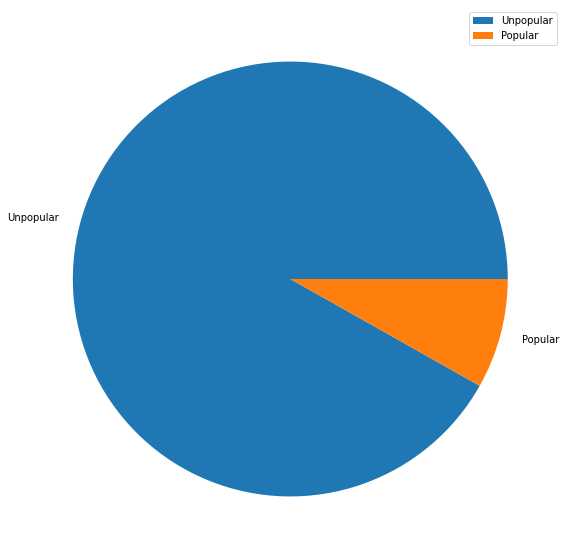

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

#sns.countplot(combined_df['is_popular'])
pop = len(combined_df[combined_df.is_popular==True])
notPop = len(combined_df[combined_df.is_popular==False])
print("Not popular:", notPop,"\nPopular:", pop)

title = '' #i don't know what to name it
d = {title: [notPop,pop]}
g = pd.DataFrame(data=d, index=['Unpopular','Popular'])
g.plot.pie(y=title,figsize=(10,10))

In [54]:
#sns.countplot(songs_2022['energy'])
#df with only popular songs
dfPop = combined_df[combined_df.is_popular]
dfPop

,track_name,artist_name,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,is_popular
0,Shake It,Metro Station,0.618,0.955,-3.836,1,4,0.0798,0.002210,0.000003,0.4860,0.790,150.034,179947,True
1,Chinese New Year,SALES,0.744,0.845,-7.422,0,4,0.2530,0.759000,0.232000,0.1000,0.749,75.221,160000,True
2,Baby I'm Yours,Breakbot,0.829,0.792,-3.755,0,2,0.0668,0.726000,0.000006,0.1220,0.758,118.050,215507,True
3,The Git Up,Blanco Brown,0.847,0.678,-8.635,1,9,0.1090,0.066900,0.000000,0.2740,0.811,97.984,200594,True
4,Say Hey (I Love You),Michael Franti & Spearhead,0.738,0.983,-4.374,0,5,0.0855,0.038000,0.000006,0.1830,0.957,92.998,235760,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,The Less I Know The Better,Tame Impala,0.640,0.740,-4.083,1,4,0.0284,0.011500,0.006780,0.1670,0.785,116.879,216320,True
259,Dandelions,Ruth B.,0.609,0.692,-2.958,1,1,0.0259,0.015700,0.000000,0.0864,0.454,116.959,233720,True
260,Jimmy Cooks (feat. 21 Savage),Drake,0.529,0.673,-4.711,1,0,0.1750,0.000307,0.000002,0.0930,0.366,165.921,218365,True
261,Good Looking,Suki Waterhouse,0.377,0.558,-9.076,1,4,0.0299,0.078900,0.000342,0.1250,0.267,149.971,214800,True


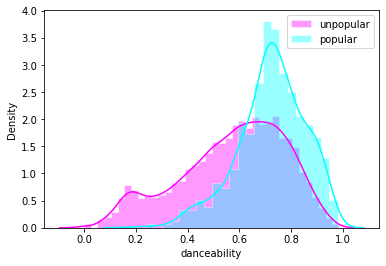

In [55]:
sns.histplot(unpopular_songs['danceability'], color='magenta', label='unpopular', kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), element="step")
sns.histplot(dfPop['danceability'], color='cyan', label='popular',  kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), element="step")
plt.legend()
plt.show()

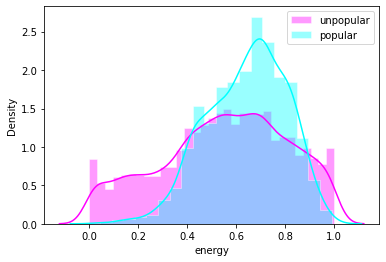

In [56]:
sns.histplot(unpopular_songs['energy'], color='magenta', label='unpopular', kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), element="step")
sns.histplot(dfPop['energy'], color='cyan', label='popular', kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), element="step")
plt.legend()
plt.show()

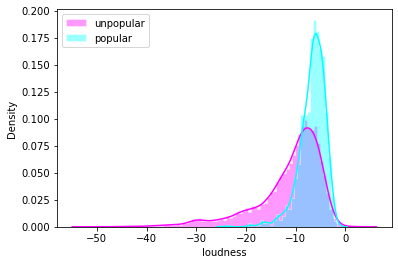

In [57]:
sns.histplot(unpopular_songs['loudness'], color='magenta', label='unpopular',kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), element="step")
sns.histplot(dfPop['loudness'], color='cyan', label='popular',kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), element="step")
plt.legend()
plt.show()

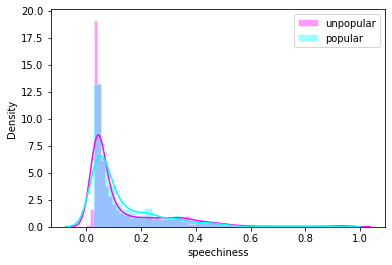

In [58]:
sns.histplot(unpopular_songs['speechiness'], color='magenta', label='unpopular',kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), element="step")
sns.histplot(dfPop['speechiness'], color='cyan', label='popular',kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), element="step")
plt.legend()
plt.show()

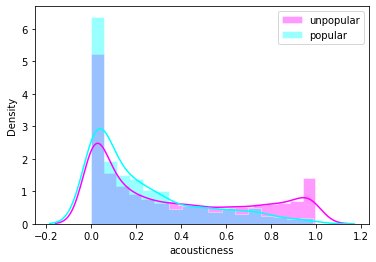

In [59]:
sns.histplot(unpopular_songs['acousticness'], color='magenta', label='unpopular', kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), element="step")
sns.histplot(dfPop['acousticness'], color='cyan', label='popular', kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), element="step")
plt.legend()
plt.show()

c:\Users\fcarras\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\fcarras\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


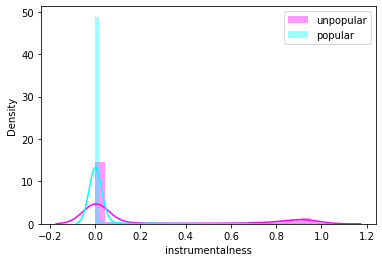

In [82]:
sns.distplot(unpopular_songs['instrumentalness'], color='magenta', label='unpopular') 
sns.distplot(dfPop['instrumentalness'], color='cyan', label='popular') 
plt.legend()
plt.show()

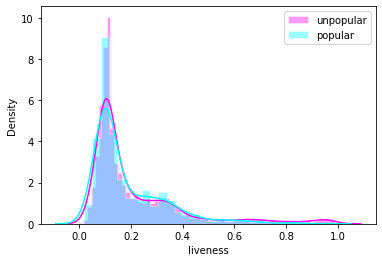

In [63]:
sns.histplot(unpopular_songs['liveness'], color='magenta', label='unpopular', kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), element="step") 
sns.histplot(dfPop['liveness'], color='cyan', label='popular', kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), element="step") 
plt.legend()
plt.show()

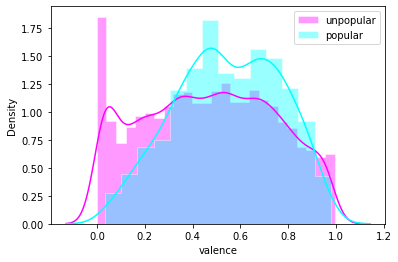

In [64]:
sns.histplot(unpopular_songs['valence'], color='magenta', label='unpopular', kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), element="step")
sns.histplot(dfPop['valence'], color='cyan', label='popular', kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), element="step")
plt.legend()
plt.show()

Comparing tempos

There is a big spike around 120 bpm in the popular songs.
On average, faster songs are more popular than slower songs.

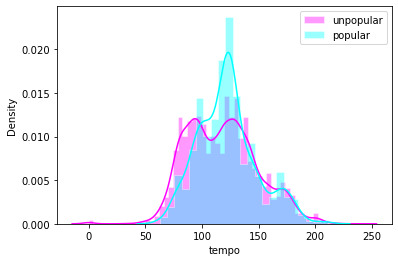

In [65]:
sns.histplot(unpopular_songs['tempo'], color='magenta', label='unpopular', kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), element="step") 
sns.histplot(dfPop['tempo'], color='cyan', label='popular', kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), element="step")
plt.legend()
plt.show()

In [66]:
dfPop['tempo'].describe()

count    968.000000
mean     122.306415
std       25.947943
min       62.619000
25%      103.033500
50%      121.364000
75%      135.993500
max      210.857000
Name: tempo, dtype: float64

In [67]:
unpopular_songs['tempo'].describe()

count    10877.000000
mean       117.827552
std         31.193596
min          0.000000
25%         92.996000
50%        117.141000
75%        138.934000
max        239.500000
Name: tempo, dtype: float64

Comparing different keys

The graphs have similarities. In the popular songs, there is a significant decrease in songs with keys in C, D, F, and A (0, 2, 7, 9) compared to the unpopular songs

<AxesSubplot:xlabel='key', ylabel='count'>

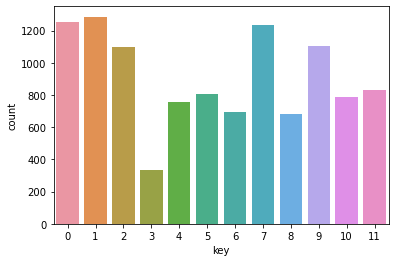

In [68]:
keys = ['C', 'C#/Db', 'D', 'D#/Eb', 'E', 'F', 'F#/Gb', 'A', 'A#/Bb', 'B'] #rename maybe
sns.countplot(x = unpopular_songs['key']) 


<AxesSubplot:xlabel='key', ylabel='count'>

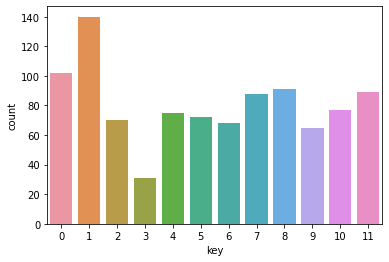

In [69]:
sns.countplot(x = dfPop['key'])